# Importing helper libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries to read the ```.env``` file

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

True

# Importing the column names

In [3]:
column_names = os.getenv("COLUMN_NAMES").split(",")
print(column_names)

['Wifes_age', 'Wifes_education', 'Husbands_education', 'Num_children_born', 'Wifes_religion', 'Wife_working', 'Husbands_occupation', 'Standard_of_living', 'Media_exposure', 'Contraceptive_method']


# Reading the dataset

In [4]:
df = pd.read_csv(os.getenv("DATASET_PATH"), header=None, names=column_names)

# Exploring the dataset

In [5]:
df.head()

,Wifes_age,Wifes_education,Husbands_education,Num_children_born,Wifes_religion,Wife_working,Husbands_occupation,Standard_of_living,Media_exposure,Contraceptive_method
0,1845.0,1,3,10.0,1,1,3,4,0,1
1,NaN,2,3,7.0,1,1,3,4,0,1
2,NaN,3,2,9.0,1,1,3,3,0,1
3,36.0,3,3,8.0,1,1,3,2,0,1
4,#invalid,4,4,0.0,1,1,3,3,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Wifes_age             978 non-null    object
 1   Wifes_education       1347 non-null   object
 2   Husbands_education    1347 non-null   object
 3   Num_children_born     980 non-null    object
 4   Wifes_religion        1347 non-null   object
 5   Wife_working          1347 non-null   object
 6   Husbands_occupation   1347 non-null   object
 7   Standard_of_living    1347 non-null   object
 8   Media_exposure        1347 non-null   object
 9   Contraceptive_method  1347 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 105.4+ KB


In [7]:
df.isna().sum()

Wifes_age               369
Wifes_education           0
Husbands_education        0
Num_children_born       367
Wifes_religion            0
Wife_working              0
Husbands_occupation       0
Standard_of_living        0
Media_exposure            0
Contraceptive_method      0
dtype: int64

In [8]:
df.shape

(1347, 10)

# Handling missing values

In [9]:
df['Wifes_age'] = df['Wifes_age'].fillna(df['Wifes_age'].mode()[0])

In [10]:
df['Wifes_age'].unique()

array(['1845.0', '25.0', '36.0', '#invalid', '38.0', '21.0', '45.0',
       '44.0', '1558.0', '48.0', '1599.0', '1066.0', '46.0', '39.0',
       '1640.0', '24.0', '1763.0', '31.0', '33.0', '28.0', '47.0',
       '1025.0', '26.0', '34.0', '820.0', '49.0', '1722.0', '20.0',
       '1927.0', '30.0', '29.0', '861.0', '984.0', '1353.0', '35.0',
       '27.0', '41.0', '17.0', '23.0', '22.0', '32.0', '37.0', '43.0',
       '1148.0', '1804.0', '1435.0', '902.0', '40.0', '19.0', '18.0',
       '42.0', '1476.0', '1271.0', '1230.0', '1189.0', '943.0', '16.0',
       '2009.0', '779.0', '1394.0', '1107.0', '1517.0', '1681.0',
       '1886.0', '1968.0'], dtype=object)

# Converting the datatypes to integer

In [11]:
df['Wifes_age'] = df['Wifes_age'].replace('#invalid', df['Wifes_age'].mode()[0])

df = df.apply(pd.to_numeric, downcast='integer', errors='coerce')

# Only taking the age values less than 100

In [12]:
df = df[df['Wifes_age'] < 100]

In [13]:
df['Num_children_born'].fillna(0)

1       7.0
2       9.0
3       8.0
4       0.0
5       0.0
       ... 
1342    3.0
1343    0.0
1344    0.0
1345    0.0
1346    4.0
Name: Num_children_born, Length: 1152, dtype: float64

In [14]:
df.isna().sum()

Wifes_age                 0
Wifes_education          35
Husbands_education       30
Num_children_born       347
Wifes_religion           37
Wife_working             28
Husbands_occupation      35
Standard_of_living       38
Media_exposure           35
Contraceptive_method      0
dtype: int64

# Plotting a correlation plot for finding out any interesting fact about the data

<Axes: >

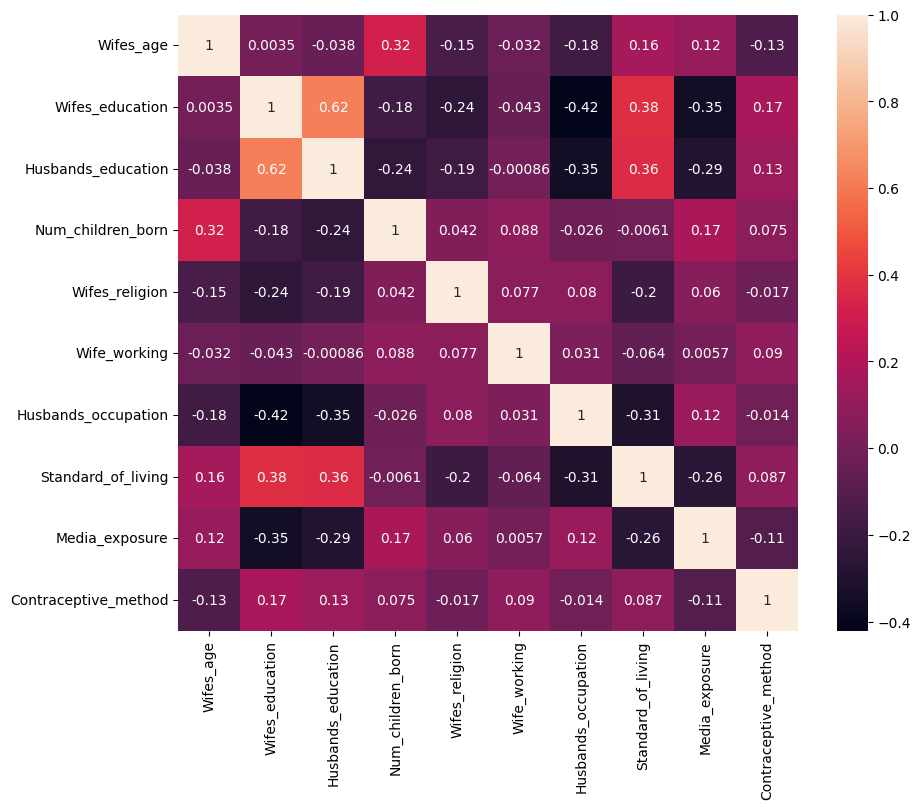

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Separating the target feature and data

In [16]:
X = df.drop('Contraceptive_method', axis=1)
Y = df['Contraceptive_method']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Importing necessary libraries

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Pipeline for Decision Tree Classifier

In [19]:
pipeline_decisionTreeClassifier = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', DecisionTreeClassifier())
])

In [20]:
pipeline_decisionTreeClassifier.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model', DecisionTreeClassifier())])

In [21]:
y_test_pred_decisionTreeClassifier = pipeline_decisionTreeClassifier.predict(x_test)

# General function to get metrics

In [22]:
def get_scores(model_type: str, y_test, y_test_pred):
    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average="weighted")
    precision = precision_score(y_test, y_test_pred, average="weighted")
    f1 = f1_score(y_test, y_test_pred, average="weighted")
    confusionMatrix = confusion_matrix(y_test, y_test_pred)
    confusionMatrix_df = pd.DataFrame(confusionMatrix, index=[f"Actual {i}" for i in sorted(set(y_test))], columns=[f"Pred {i}" for i in sorted(set(y_test))])

    print(f"\nEvaluation Metrics for {model_type}:\n")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print()
    print("Confusion Matrix: ")
    print(confusionMatrix_df)

In [23]:
get_scores("Decision Tree Classifier", y_test, y_test_pred_decisionTreeClassifier)


Evaluation Metrics for Decision Tree Classifier:

Accuracy : 0.5671
Recall   : 0.5671
Precision: 0.5767
F1 Score : 0.5710

Confusion Matrix: 
          Pred 1  Pred 2  Pred 3
Actual 1      78      14      30
Actual 2      13      18       9
Actual 3      22      12      35


# Pipeline for RandomForestClassifier

In [24]:
pipeline_randomForestClassifier = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', RandomForestClassifier())
])

In [25]:
pipeline_randomForestClassifier.fit(x_train, y_train)
y_test_pred_randomForestClassifier = pipeline_randomForestClassifier.predict(x_test)

In [26]:
get_scores("Random Forest Classifer", y_test, y_test_pred_randomForestClassifier)


Evaluation Metrics for Random Forest Classifer:

Accuracy : 0.6061
Recall   : 0.6061
Precision: 0.5991
F1 Score : 0.6000

Confusion Matrix: 
          Pred 1  Pred 2  Pred 3
Actual 1      90       8      24
Actual 2      13      13      14
Actual 3      25       7      37


# Pipeline for Logistic Regression

In [27]:
pipeline_logisticRegressor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [28]:
pipeline_logisticRegressor.fit(x_train, y_train)
y_test_pred_logisticRegressor = pipeline_logisticRegressor.predict(x_test)

In [29]:
get_scores("Logistic Regressor", y_test, y_test_pred_logisticRegressor)


Evaluation Metrics for Logistic Regressor:

Accuracy : 0.5022
Recall   : 0.5022
Precision: 0.4747
F1 Score : 0.4806

Confusion Matrix: 
          Pred 1  Pred 2  Pred 3
Actual 1      88      14      20
Actual 2      21      10       9
Actual 3      42       9      18


# Finding the importance of features

In [30]:
rf_model = pipeline_randomForestClassifier.named_steps['model']
importances = rf_model.feature_importances_
feature_names = [col for col in column_names if col != 'Contraceptive_method']

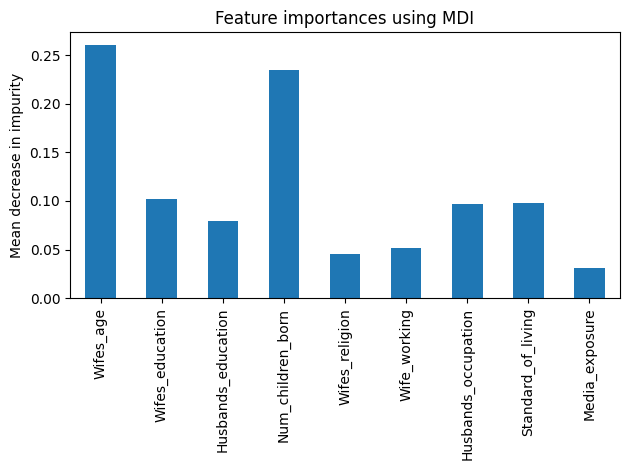

In [31]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Saving the model

In [32]:
import joblib

joblib.dump(pipeline_randomForestClassifier, os.getenv("MODEL_PATH"))

['C:\\\\Users\\\\Legion\\\\Desktop\\\\contraceptive\\\\model\\\\model_rf.pkl']